# Dataframe Superficie media Compraventa viviendas registradas 

**El objetivo de este proyecto es modelar, limpiar y analizar los datos que van a ser útiles para el analisis final. Y convertirlo en un solo dataframe.**


Lo primero que vamos a realizar es cargar las librerias que vamos a utilizar. Y cargar los datasets que tenemos en formato cvs. Compraventa de viviendas registradas por superficie (2018,2019,2020,2021,2022)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as g

import warnings
warnings.filterwarnings("ignore")

df_1 = pd.read_csv("2018_comp_vend_sup.csv")
df_2 = pd.read_csv("2019_comp_vend_sup_trim.csv")
df_3 = pd.read_csv("2020_comp_vend_sup_trim.csv")
df_4 = pd.read_csv("2021_comp_vend_sup_trim.csv")
df_5 = pd.read_csv("2022_comp_vend_sup_trim.csv")

## 1.Modelar y limpiar Datos: 

**1.1** Viaualizamos los datos del df_1 observamos que la columna 'Superficie_mitjana_(m2_construïts)' tiene diferentes con diferentes valores, y lo que haremos será convertirlo en columnas, y eliminar la columna 'Nombre' para que los valores vayan en las filas correspondientes.

**Dataset df_1 año 2018**

In [2]:
df_1

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Superfície_mitjana_(m2_construïts),Nombre
0,2018,1,Ciutat Vella,1,el Raval,Total,62.8
1,2018,1,Ciutat Vella,2,el Barri Gòtic,Total,97.4
2,2018,1,Ciutat Vella,3,la Barceloneta,Total,46.4
3,2018,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Total,68.9
4,2018,2,Eixample,5,el Fort Pienc,Total,84.9
...,...,...,...,...,...,...,...
287,2018,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Habitatge usat,93.0
288,2018,10,Sant Martí,70,el Besòs i el Maresme,Habitatge usat,67.4
289,2018,10,Sant Martí,71,Provençals del Poblenou,Habitatge usat,67.1
290,2018,10,Sant Martí,72,Sant Martí de Provençals,Habitatge usat,71.8


In [3]:
valores_unicos = df_1['Superfície_mitjana_(m2_construïts)'].unique()
for valor in valores_unicos:
    print(valor)

Total
Habitatge nou lliure
Habitatge nou protegit
Habitatge usat


A continuación vamos a eliminar las columnas que no nos sirven. Con la función **drop()** en este caso como son dos columnas, solo vamos a introduccir en el apartado labels el nombre de las columnas,y en axis = 1. La sintaxis básica del método drop() es la siguiente:

**DataFrame.drop(labels, axis=0, inplace=False)**

In [4]:
df_1 = df_1.drop(["Codi_Districte", "Codi_Barri"], axis=1)

print(df_1)

      Any Nom_Districte                                     Nom_Barri  \
0    2018  Ciutat Vella                                      el Raval   
1    2018  Ciutat Vella                                el Barri Gòtic   
2    2018  Ciutat Vella                                la Barceloneta   
3    2018  Ciutat Vella         Sant Pere, Santa Caterina i la Ribera   
4    2018      Eixample                                 el Fort Pienc   
..    ...           ...                                           ...   
287  2018    Sant Martí  Diagonal Mar i el Front Marítim del Poblenou   
288  2018    Sant Martí                         el Besòs i el Maresme   
289  2018    Sant Martí                       Provençals del Poblenou   
290  2018    Sant Martí                      Sant Martí de Provençals   
291  2018    Sant Martí                           la Verneda i la Pau   

    Superfície_mitjana_(m2_construïts)  Nombre  
0                                Total    62.8  
1                        

A continuación vamos a utilizar la función pivot para convertir los datos de la columna 'Preu_mitja_habitatge' en columnas. La sintaxis de la función **pivot()** para nuestro caso es la siguiente:

**pivote = df_1.pivot(index=['Columna_índice_1', 'Columna_índice_2'], columns='Columna_pivote', values='Columna_valor')**

*Reiniciar los índices y dar nombres a las columnas*

**pivote = pivote.reset_index() pivote.columns.name = None**

In [5]:
pivote = df_1.pivot(index= ['Any','Nom_Barri'], columns='Superfície_mitjana_(m2_construïts)', values='Nombre')

# Reiniciar los índices y dar nombres a las columnas
pivote = pivote.reset_index()
pivote.columns.name = None

# Visualizar el nuevo dataframe pivote
print(pivote)

     Any                      Nom_Barri  Habitatge nou lliure  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    Habitatge nou protegit  Habitatge usat  Total  
0                      NaN            83.7   83.7  
1                      NaN            65.0   65.0  
2                      NaN            55.7   55.7  
3          

In [6]:
nuevos_nombres = {
    'Habitatge nou lliure': 'mitjana_m2_Obra_Nova',
    'Habitatge nou protegit': 'mitjana_m2_Obra_Nova_protegit',
    'Habitatge usat': 'mitjana_m2_2ª_Ma',
    'Total': 'Total_mitjana_m2',
}
df_1_pivot = pivote.rename(columns=nuevos_nombres)

print(df_1_pivot)

     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             NaN              65.0              65.0  
2  

In [7]:
df_1_pivot

,Any,Nom_Barri,mitjana_m2_Obra_Nova,mitjana_m2_Obra_Nova_protegit,mitjana_m2_2ª_Ma,Total_mitjana_m2
0,2018,Baró de Viver,NaN,NaN,83.7,83.7
1,2018,Can Baró,NaN,NaN,65.0,65.0
2,2018,Can Peguera,NaN,NaN,55.7,55.7
3,2018,Canyelles,NaN,NaN,78.0,78.0
4,2018,Ciutat Meridiana,NaN,NaN,59.0,59.0
...,...,...,...,...,...,...
68,2018,la Vila Olímpica del Poblenou,NaN,NaN,107.6,107.6
69,2018,la Vila de Gràcia,91.6,NaN,75.1,76.2
70,2018,les Corts,92.8,NaN,84.3,84.9
71,2018,les Roquetes,NaN,NaN,59.0,59.0


Vamos a visualizar estos datos en un histograma. Utilizaremos las libreria matplotilib.pyplot as plt

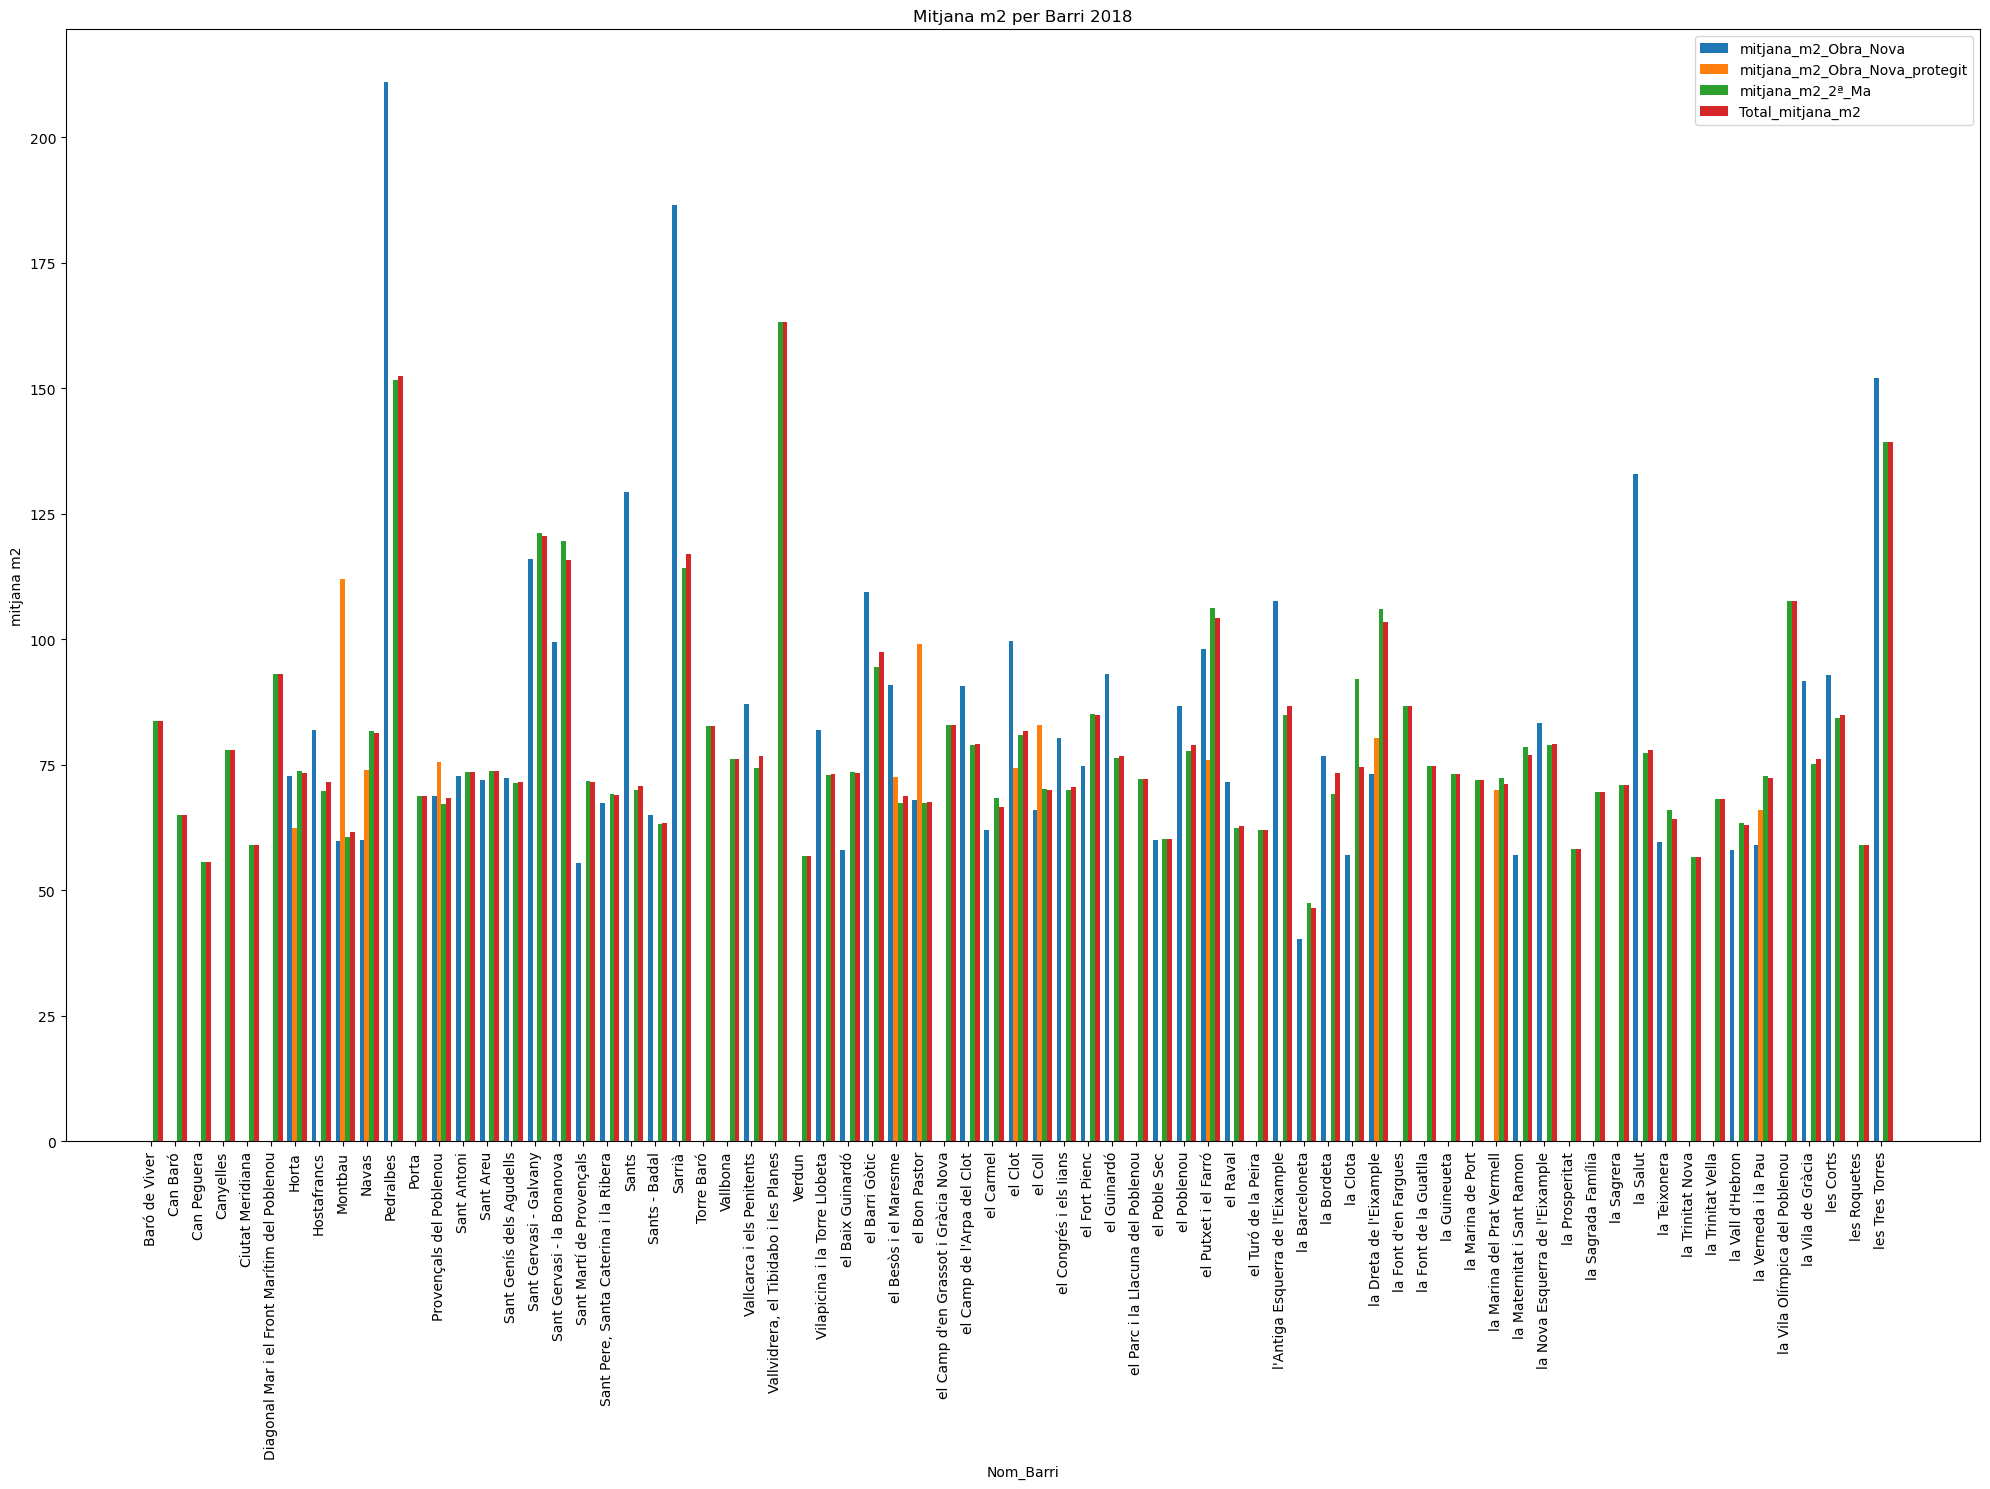

In [8]:
# Extraer los valores de las columnas relevantes
nom_barri = df_1_pivot["Nom_Barri"]
mitjana_m2_obra_nova = df_1_pivot["mitjana_m2_Obra_Nova"]
mitjana_m2_obra_nova_protegit = df_1_pivot["mitjana_m2_Obra_Nova_protegit"]
mitjana_m2_2a_ma = df_1_pivot["mitjana_m2_2ª_Ma"]
total_mitjana_m2 = df_1_pivot["Total_mitjana_m2"]

# Configuración de los datos
barrios = np.arange(len(nom_barri))  # Posiciones de las barras en el eje x
ancho_barra = 0.2  # Ancho de las barras

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(20, 15))  # Opcional: ajustar el tamaño de la figura
plt.bar(barrios, mitjana_m2_obra_nova, width=ancho_barra, label="mitjana_m2_Obra_Nova")
plt.bar(barrios + ancho_barra, mitjana_m2_obra_nova_protegit, width=ancho_barra, label="mitjana_m2_Obra_Nova_protegit")
plt.bar(barrios + (2 * ancho_barra), mitjana_m2_2a_ma, width=ancho_barra, label="mitjana_m2_2ª_Ma")
plt.bar(barrios + (3 * ancho_barra), total_mitjana_m2, width=ancho_barra, label="Total_mitjana_m2")

# Personalizar el gráfico
plt.xlabel("Nom_Barri")
plt.ylabel("mitjana m2")
plt.title("Mitjana m2 per Barri 2018")
plt.xticks(barrios + ancho_barra, nom_barri, rotation=90
          )  # Etiquetas del eje x
plt.legend()  # Mostrar la leyenda

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()



**Dataset df_2 año 2019**

In [55]:
df_2

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Superfície_mitjana_(m2_construïts),Nombre
0,2019,1,1,Ciutat Vella,1,el Raval,Total,58.9
1,2019,1,1,Ciutat Vella,2,el Barri Gòtic,Total,84.9
2,2019,1,1,Ciutat Vella,3,la Barceloneta,Total,45.7
3,2019,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Total,65.3
4,2019,1,2,Eixample,5,el Fort Pienc,Total,97.4
...,...,...,...,...,...,...,...,...
1163,2019,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Habitatge usat,82.1
1164,2019,4,10,Sant Martí,70,el Besòs i el Maresme,Habitatge usat,68.5
1165,2019,4,10,Sant Martí,71,Provençals del Poblenou,Habitatge usat,75.5
1166,2019,4,10,Sant Martí,72,Sant Martí de Provençals,Habitatge usat,70.6


In [56]:
df_2 = df_2.drop(["Codi_Districte", "Codi_Barri"], axis=1)

print(df_2)

       Any  Trimestre Nom_Districte  \
0     2019          1  Ciutat Vella   
1     2019          1  Ciutat Vella   
2     2019          1  Ciutat Vella   
3     2019          1  Ciutat Vella   
4     2019          1      Eixample   
...    ...        ...           ...   
1163  2019          4    Sant Martí   
1164  2019          4    Sant Martí   
1165  2019          4    Sant Martí   
1166  2019          4    Sant Martí   
1167  2019          4    Sant Martí   

                                         Nom_Barri  \
0                                         el Raval   
1                                   el Barri Gòtic   
2                                   la Barceloneta   
3            Sant Pere, Santa Caterina i la Ribera   
4                                    el Fort Pienc   
...                                            ...   
1163  Diagonal Mar i el Front Marítim del Poblenou   
1164                         el Besòs i el Maresme   
1165                       Provençals del Pob

In [57]:
nuevos_nombres = {
    'Habitatge nou lliure': 'mitjana_m2_Obra_Nova',
    'Habitatge nou protegit': 'mitjana_m2_Obra_Nova_protegit',
    'Habitatge usat': 'mitjana_m2_2ª_Ma',
    'Total': 'Total_mitjana_m2',
}
df_2_pivot = pivote.rename(columns=nuevos_nombres)

print(df_2_pivot)

     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             NaN              65.0              65.0  
2  

In [59]:
columnas_deseadas = ['Any', 'Nom_Barri', 'mitjana_m2_Obra_Nova', 'mitjana_m2_Obra_Nova_protegit', 'mitjana_m2_2ª_Ma', 'Total_mitjana_m2']
df_2_pivot = df_2_pivot[columnas_deseadas]

print(df_2_pivot)

     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             NaN              65.0              65.0  
2  

In [60]:
# Agrupar los datos por "Nom_Barri" y "Any" y calcular la media de cada grupo
df_media = df_2_pivot.groupby(['Any','Nom_Barri']).mean()

# Calcular el precio medio dividiendo la suma por el número de trimestres (en este caso, 4)
df_2_mitjana_m2 = df_media.div(4)

# Redondear el precio medio a un decimal
df_2_mitjana_m2 = df_media.round(1)

# Restablecer el índice del DataFrame
df_2_mitjana_m2 = df_2_mitjana_m2.reset_index()

# Imprimir el resultado
print("media por m2 por barrio para cada columna:")
print(df_2_mitjana_m2)

media por m2 por barrio para cada columna:
     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             Na

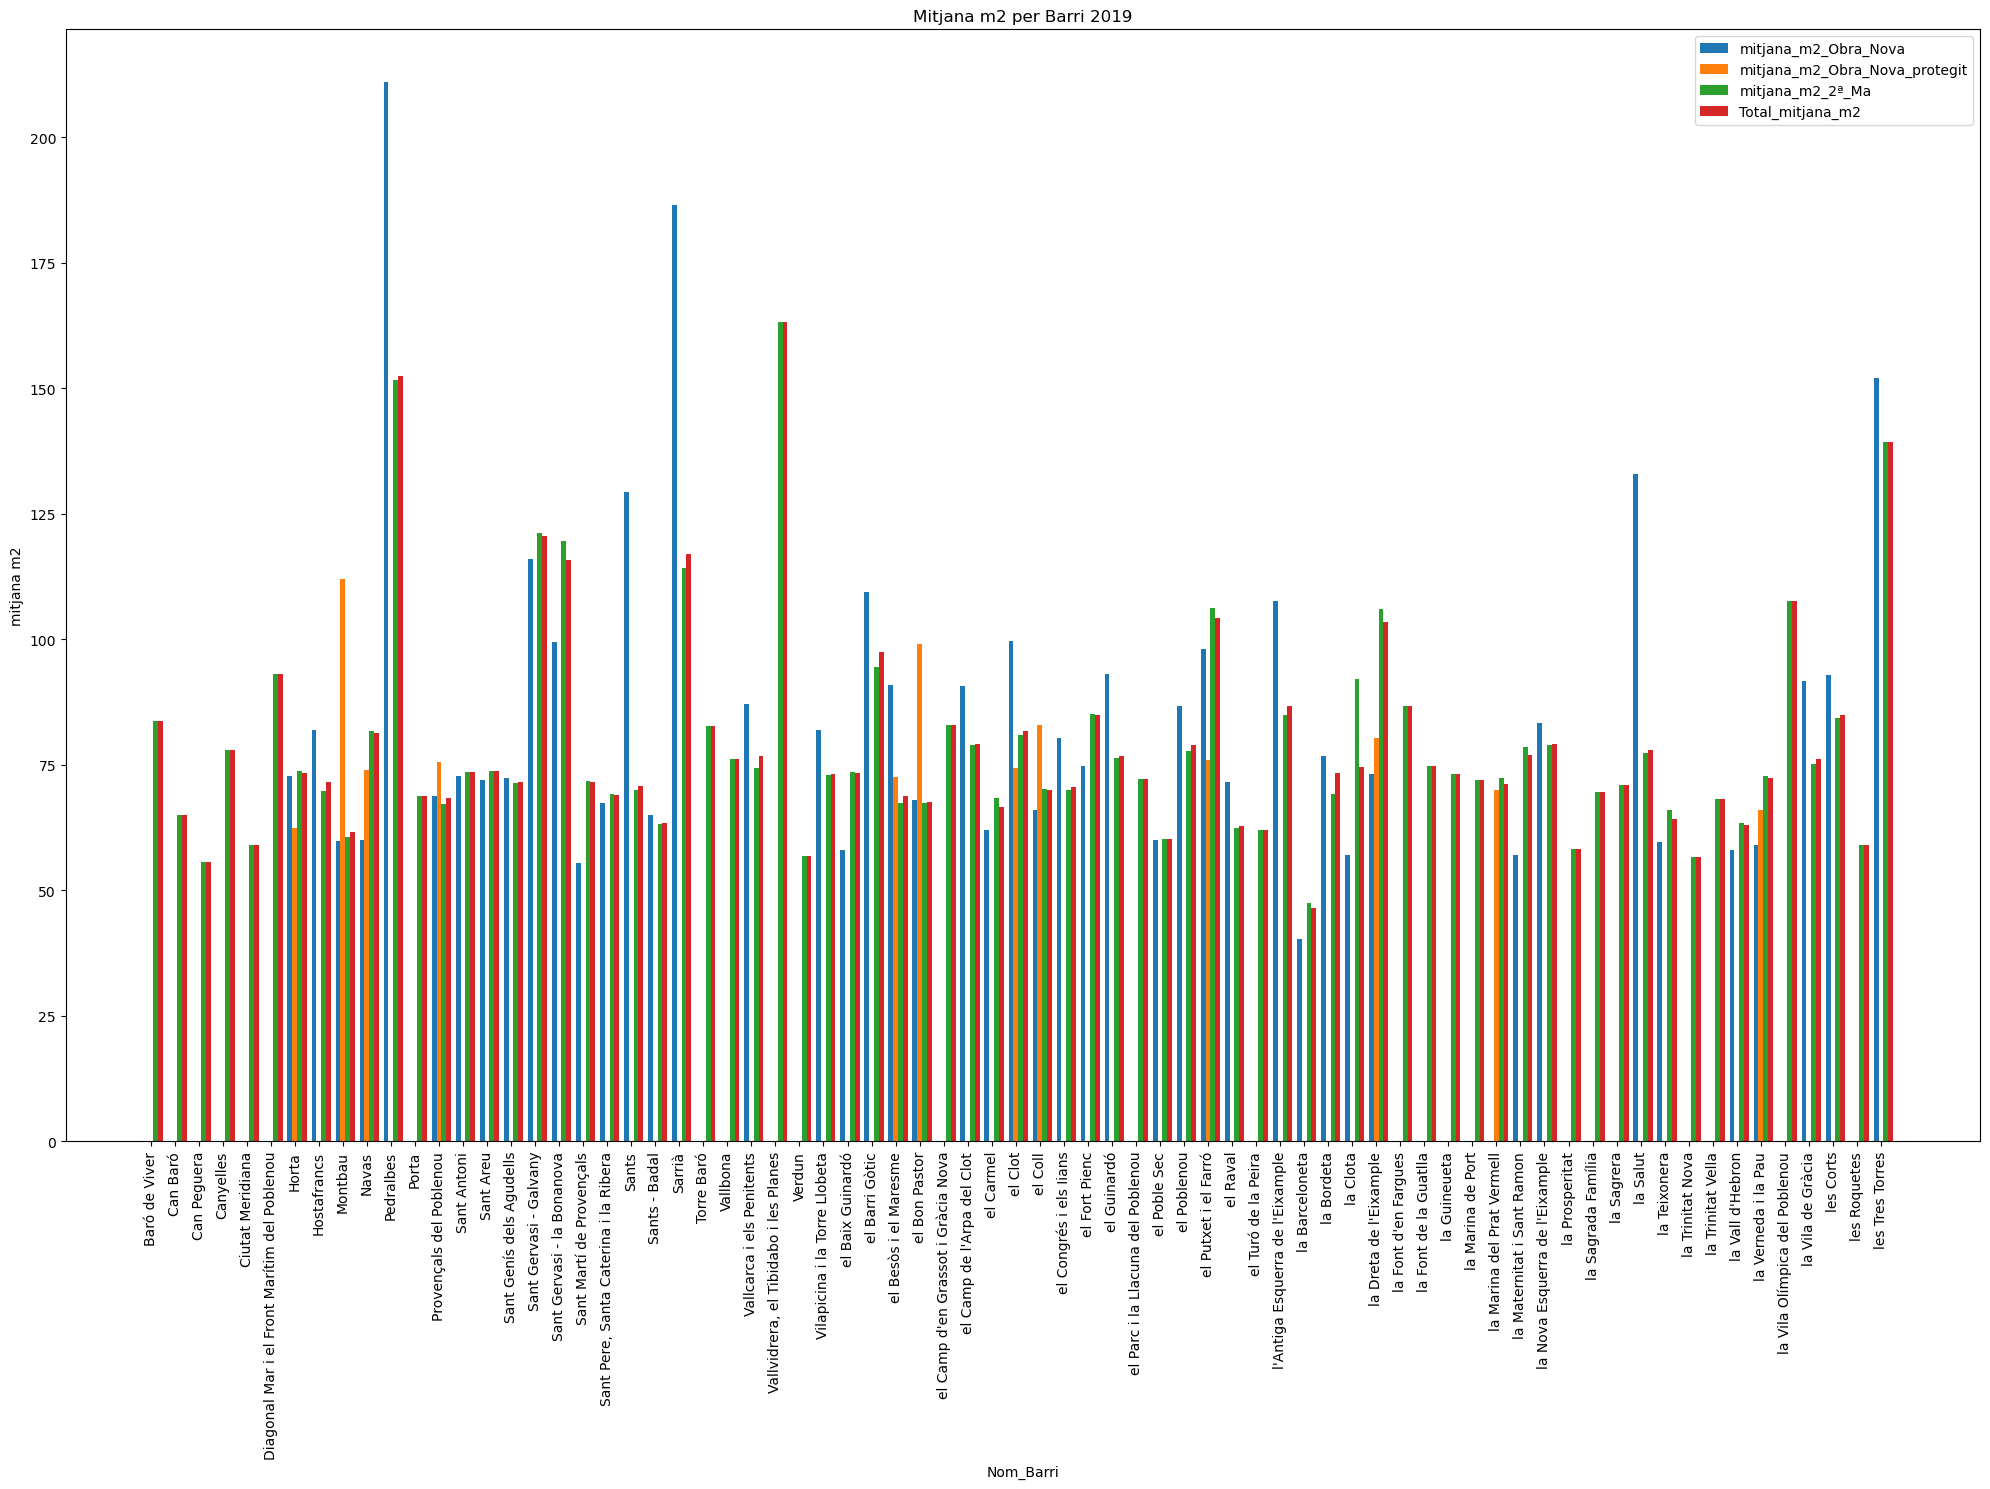

In [63]:
# Extraer los valores de las columnas relevantes
nom_barri = df_2_mitjana_m2["Nom_Barri"]
mitjana_m2_obra_nova = df_2_mitjana_m2["mitjana_m2_Obra_Nova"]
mitjana_m2_obra_nova_protegit = df_2_mitjana_m2["mitjana_m2_Obra_Nova_protegit"]
mitjana_m2_2a_ma = df_2_mitjana_m2["mitjana_m2_2ª_Ma"]
total_mitjana_m2 = df_2_mitjana_m2["Total_mitjana_m2"]

# Configuración de los datos
barrios = np.arange(len(nom_barri))  # Posiciones de las barras en el eje x
ancho_barra = 0.2  # Ancho de las barras

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(20, 15))  # Opcional: ajustar el tamaño de la figura
plt.bar(barrios, mitjana_m2_obra_nova, width=ancho_barra, label="mitjana_m2_Obra_Nova")
plt.bar(barrios + ancho_barra, mitjana_m2_obra_nova_protegit, width=ancho_barra, label="mitjana_m2_Obra_Nova_protegit")
plt.bar(barrios + (2 * ancho_barra), mitjana_m2_2a_ma, width=ancho_barra, label="mitjana_m2_2ª_Ma")
plt.bar(barrios + (3 * ancho_barra), total_mitjana_m2, width=ancho_barra, label="Total_mitjana_m2")

# Personalizar el gráfico
plt.xlabel("Nom_Barri")
plt.ylabel("mitjana m2")
plt.title("Mitjana m2 per Barri 2019")
plt.xticks(barrios + ancho_barra, nom_barri, rotation=90
          )  # Etiquetas del eje x
plt.legend()  # Mostrar la leyenda

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()

**Dataset df_3 año 2020**

In [64]:
df_3

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Superfície_mitjana_(m2_construïts),Nombre
0,2020,1,1,Ciutat Vella,1,el Raval,Total,53.9
1,2020,1,1,Ciutat Vella,2,el Barri Gòtic,Total,104.0
2,2020,1,1,Ciutat Vella,3,la Barceloneta,Total,47.1
3,2020,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Total,69.8
4,2020,1,2,Eixample,5,el Fort Pienc,Total,92.5
...,...,...,...,...,...,...,...,...
1163,2020,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Habitatge usat,107.1
1164,2020,4,10,Sant Martí,70,el Besòs i el Maresme,Habitatge usat,58.0
1165,2020,4,10,Sant Martí,71,Provençals del Poblenou,Habitatge usat,63.9
1166,2020,4,10,Sant Martí,72,Sant Martí de Provençals,Habitatge usat,77.8


In [65]:
df_3 = df_3.drop(["Codi_Districte", "Codi_Barri"], axis=1)

print(df_3)

       Any  Trimestre Nom_Districte  \
0     2020          1  Ciutat Vella   
1     2020          1  Ciutat Vella   
2     2020          1  Ciutat Vella   
3     2020          1  Ciutat Vella   
4     2020          1      Eixample   
...    ...        ...           ...   
1163  2020          4    Sant Martí   
1164  2020          4    Sant Martí   
1165  2020          4    Sant Martí   
1166  2020          4    Sant Martí   
1167  2020          4    Sant Martí   

                                         Nom_Barri  \
0                                         el Raval   
1                                   el Barri Gòtic   
2                                   la Barceloneta   
3            Sant Pere, Santa Caterina i la Ribera   
4                                    el Fort Pienc   
...                                            ...   
1163  Diagonal Mar i el Front Marítim del Poblenou   
1164                         el Besòs i el Maresme   
1165                       Provençals del Pob

In [66]:
nuevos_nombres = {
    'Habitatge nou lliure': 'mitjana_m2_Obra_Nova',
    'Habitatge nou protegit': 'mitjana_m2_Obra_Nova_protegit',
    'Habitatge usat': 'mitjana_m2_2ª_Ma',
    'Total': 'Total_mitjana_m2',
}
df_3_pivot = pivote.rename(columns=nuevos_nombres)

print(df_3_pivot)

     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             NaN              65.0              65.0  
2  

In [67]:
columnas_deseadas = ['Any', 'Nom_Barri', 'mitjana_m2_Obra_Nova', 'mitjana_m2_Obra_Nova_protegit', 'mitjana_m2_2ª_Ma', 'Total_mitjana_m2']
df_3_pivot = df_3_pivot[columnas_deseadas]

print(df_3_pivot)

     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             NaN              65.0              65.0  
2  

In [69]:
# Agrupar los datos por "Nom_Barri" y "Any" y calcular la media de cada grupo
df_media = df_3_pivot.groupby(['Any','Nom_Barri']).mean()

# Calcular el precio medio dividiendo la suma por el número de trimestres (en este caso, 4)
df_3_mitjana_m2 = df_media.div(4)

# Redondear el precio medio a un decimal
df_3_mitjana_m2 = df_media.round(1)

# Restablecer el índice del DataFrame
df_3_mitjana_m2 = df_3_mitjana_m2.reset_index()

# Imprimir el resultado
print("media por m2 por barrio para cada columna:")
print(df_3_mitjana_m2)

media por m2 por barrio para cada columna:
     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             Na

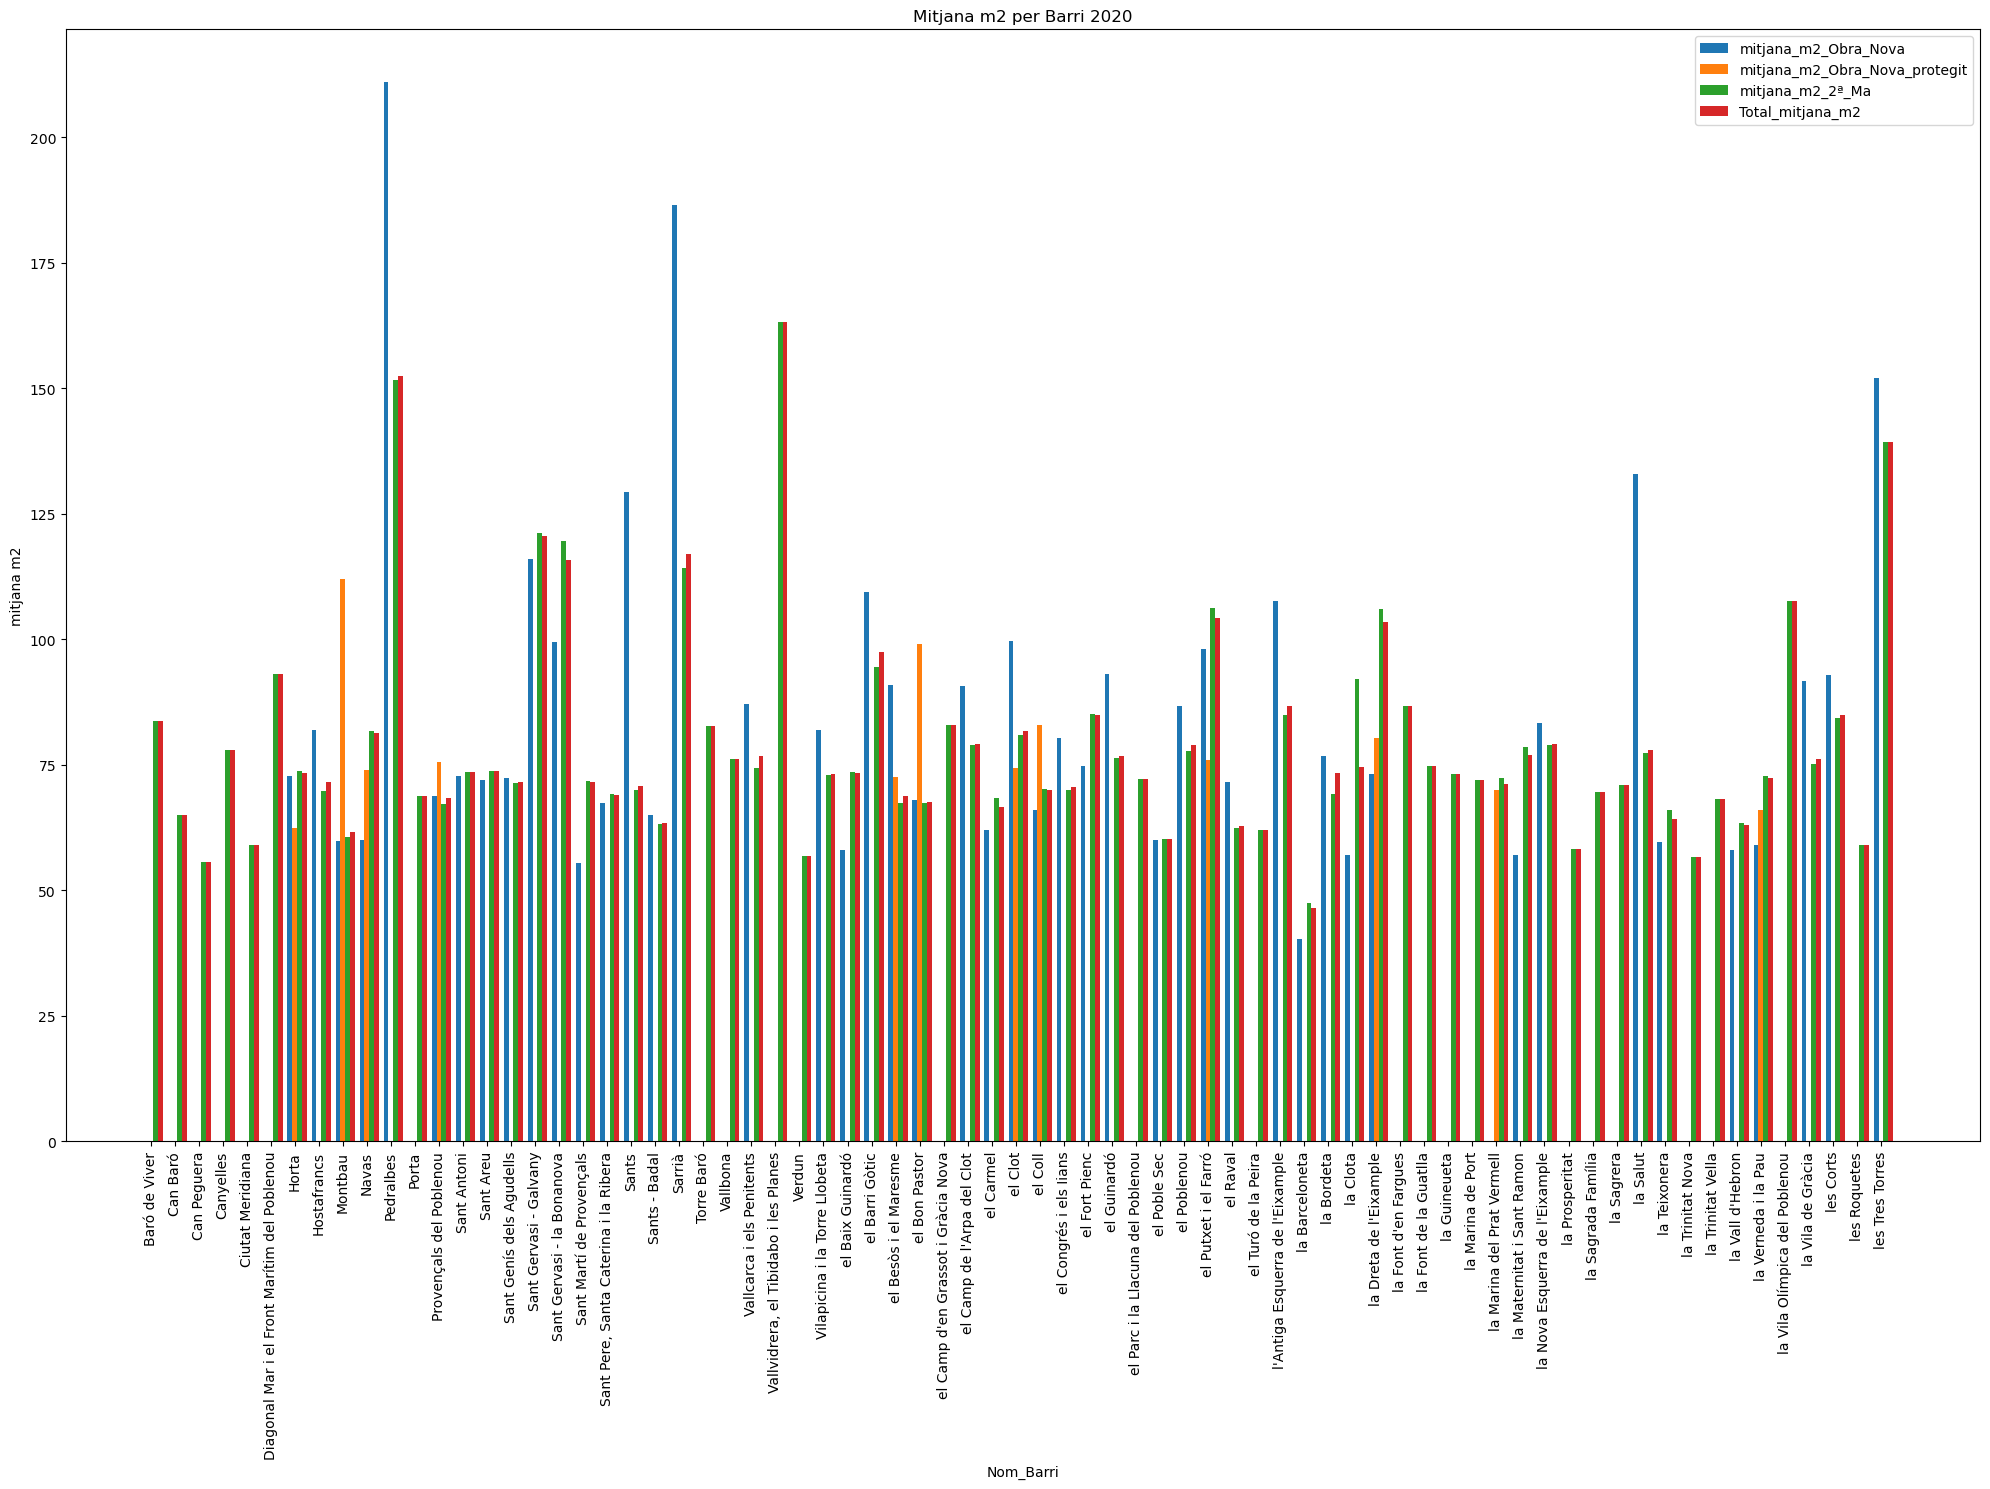

In [70]:
# Extraer los valores de las columnas relevantes
nom_barri = df_3_mitjana_m2["Nom_Barri"]
mitjana_m2_obra_nova = df_3_mitjana_m2["mitjana_m2_Obra_Nova"]
mitjana_m2_obra_nova_protegit = df_3_mitjana_m2["mitjana_m2_Obra_Nova_protegit"]
mitjana_m2_2a_ma = df_3_mitjana_m2["mitjana_m2_2ª_Ma"]
total_mitjana_m2 = df_3_mitjana_m2["Total_mitjana_m2"]

# Configuración de los datos
barrios = np.arange(len(nom_barri))  # Posiciones de las barras en el eje x
ancho_barra = 0.2  # Ancho de las barras

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(20, 15))  # Opcional: ajustar el tamaño de la figura
plt.bar(barrios, mitjana_m2_obra_nova, width=ancho_barra, label="mitjana_m2_Obra_Nova")
plt.bar(barrios + ancho_barra, mitjana_m2_obra_nova_protegit, width=ancho_barra, label="mitjana_m2_Obra_Nova_protegit")
plt.bar(barrios + (2 * ancho_barra), mitjana_m2_2a_ma, width=ancho_barra, label="mitjana_m2_2ª_Ma")
plt.bar(barrios + (3 * ancho_barra), total_mitjana_m2, width=ancho_barra, label="Total_mitjana_m2")

# Personalizar el gráfico
plt.xlabel("Nom_Barri")
plt.ylabel("mitjana m2")
plt.title("Mitjana m2 per Barri 2020")
plt.xticks(barrios + ancho_barra, nom_barri, rotation=90
          )  # Etiquetas del eje x
plt.legend()  # Mostrar la leyenda

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()

**Dataset df_4 año 2021**

In [71]:
df_4

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Superfície_mitjana_(m2_construïts),Nombre
0,2021,1,1,Ciutat Vella,1,el Raval,Total,55.6
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Total,85.0
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Total,44.3
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Total,66.4
4,2021,1,2,Eixample,5,el Fort Pienc,Total,82.9
...,...,...,...,...,...,...,...,...
1163,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Habitatge usat,93.6
1164,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Habitatge usat,65.6
1165,2021,4,10,Sant Martí,71,Provençals del Poblenou,Habitatge usat,70.8
1166,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Habitatge usat,70.7


In [72]:
df_4 = df_4.drop(["Codi_Districte", "Codi_Barri"], axis=1)

print(df_4)

       Any  Trimestre Nom_Districte  \
0     2021          1  Ciutat Vella   
1     2021          1  Ciutat Vella   
2     2021          1  Ciutat Vella   
3     2021          1  Ciutat Vella   
4     2021          1      Eixample   
...    ...        ...           ...   
1163  2021          4    Sant Martí   
1164  2021          4    Sant Martí   
1165  2021          4    Sant Martí   
1166  2021          4    Sant Martí   
1167  2021          4    Sant Martí   

                                         Nom_Barri  \
0                                         el Raval   
1                                   el Barri Gòtic   
2                                   la Barceloneta   
3            Sant Pere, Santa Caterina i la Ribera   
4                                    el Fort Pienc   
...                                            ...   
1163  Diagonal Mar i el Front Marítim del Poblenou   
1164                         el Besòs i el Maresme   
1165                       Provençals del Pob

In [73]:
nuevos_nombres = {
    'Habitatge nou lliure': 'mitjana_m2_Obra_Nova',
    'Habitatge nou protegit': 'mitjana_m2_Obra_Nova_protegit',
    'Habitatge usat': 'mitjana_m2_2ª_Ma',
    'Total': 'Total_mitjana_m2',
}
df_4_pivot = pivote.rename(columns=nuevos_nombres)

print(df_4_pivot)

     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             NaN              65.0              65.0  
2  

In [74]:
columnas_deseadas = ['Any', 'Nom_Barri', 'mitjana_m2_Obra_Nova', 'mitjana_m2_Obra_Nova_protegit', 'mitjana_m2_2ª_Ma', 'Total_mitjana_m2']
df_4_pivot = df_4_pivot[columnas_deseadas]

print(df_4_pivot)

     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             NaN              65.0              65.0  
2  

In [82]:
# Agrupar los datos por "Nom_Barri" y "Any" y calcular la media de cada grupo
df_media = df_4_pivot.groupby(['Any','Nom_Barri']).mean()

# Calcular el precio medio dividiendo la suma por el número de trimestres (en este caso, 4)
df_4_mitjana_m2 = df_media.div(4)

# Redondear el precio medio a un decimal
df_4_mitjana_m2 = df_media.round(1)

# Restablecer el índice del DataFrame
df_4_mitjana_m2 = df_4_mitjana_m2.reset_index()

# Imprimir el resultado
print("media por m2 por barrio para cada columna:")
print(df_4_mitjana_m2)

media por m2 por barrio para cada columna:
     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             Na

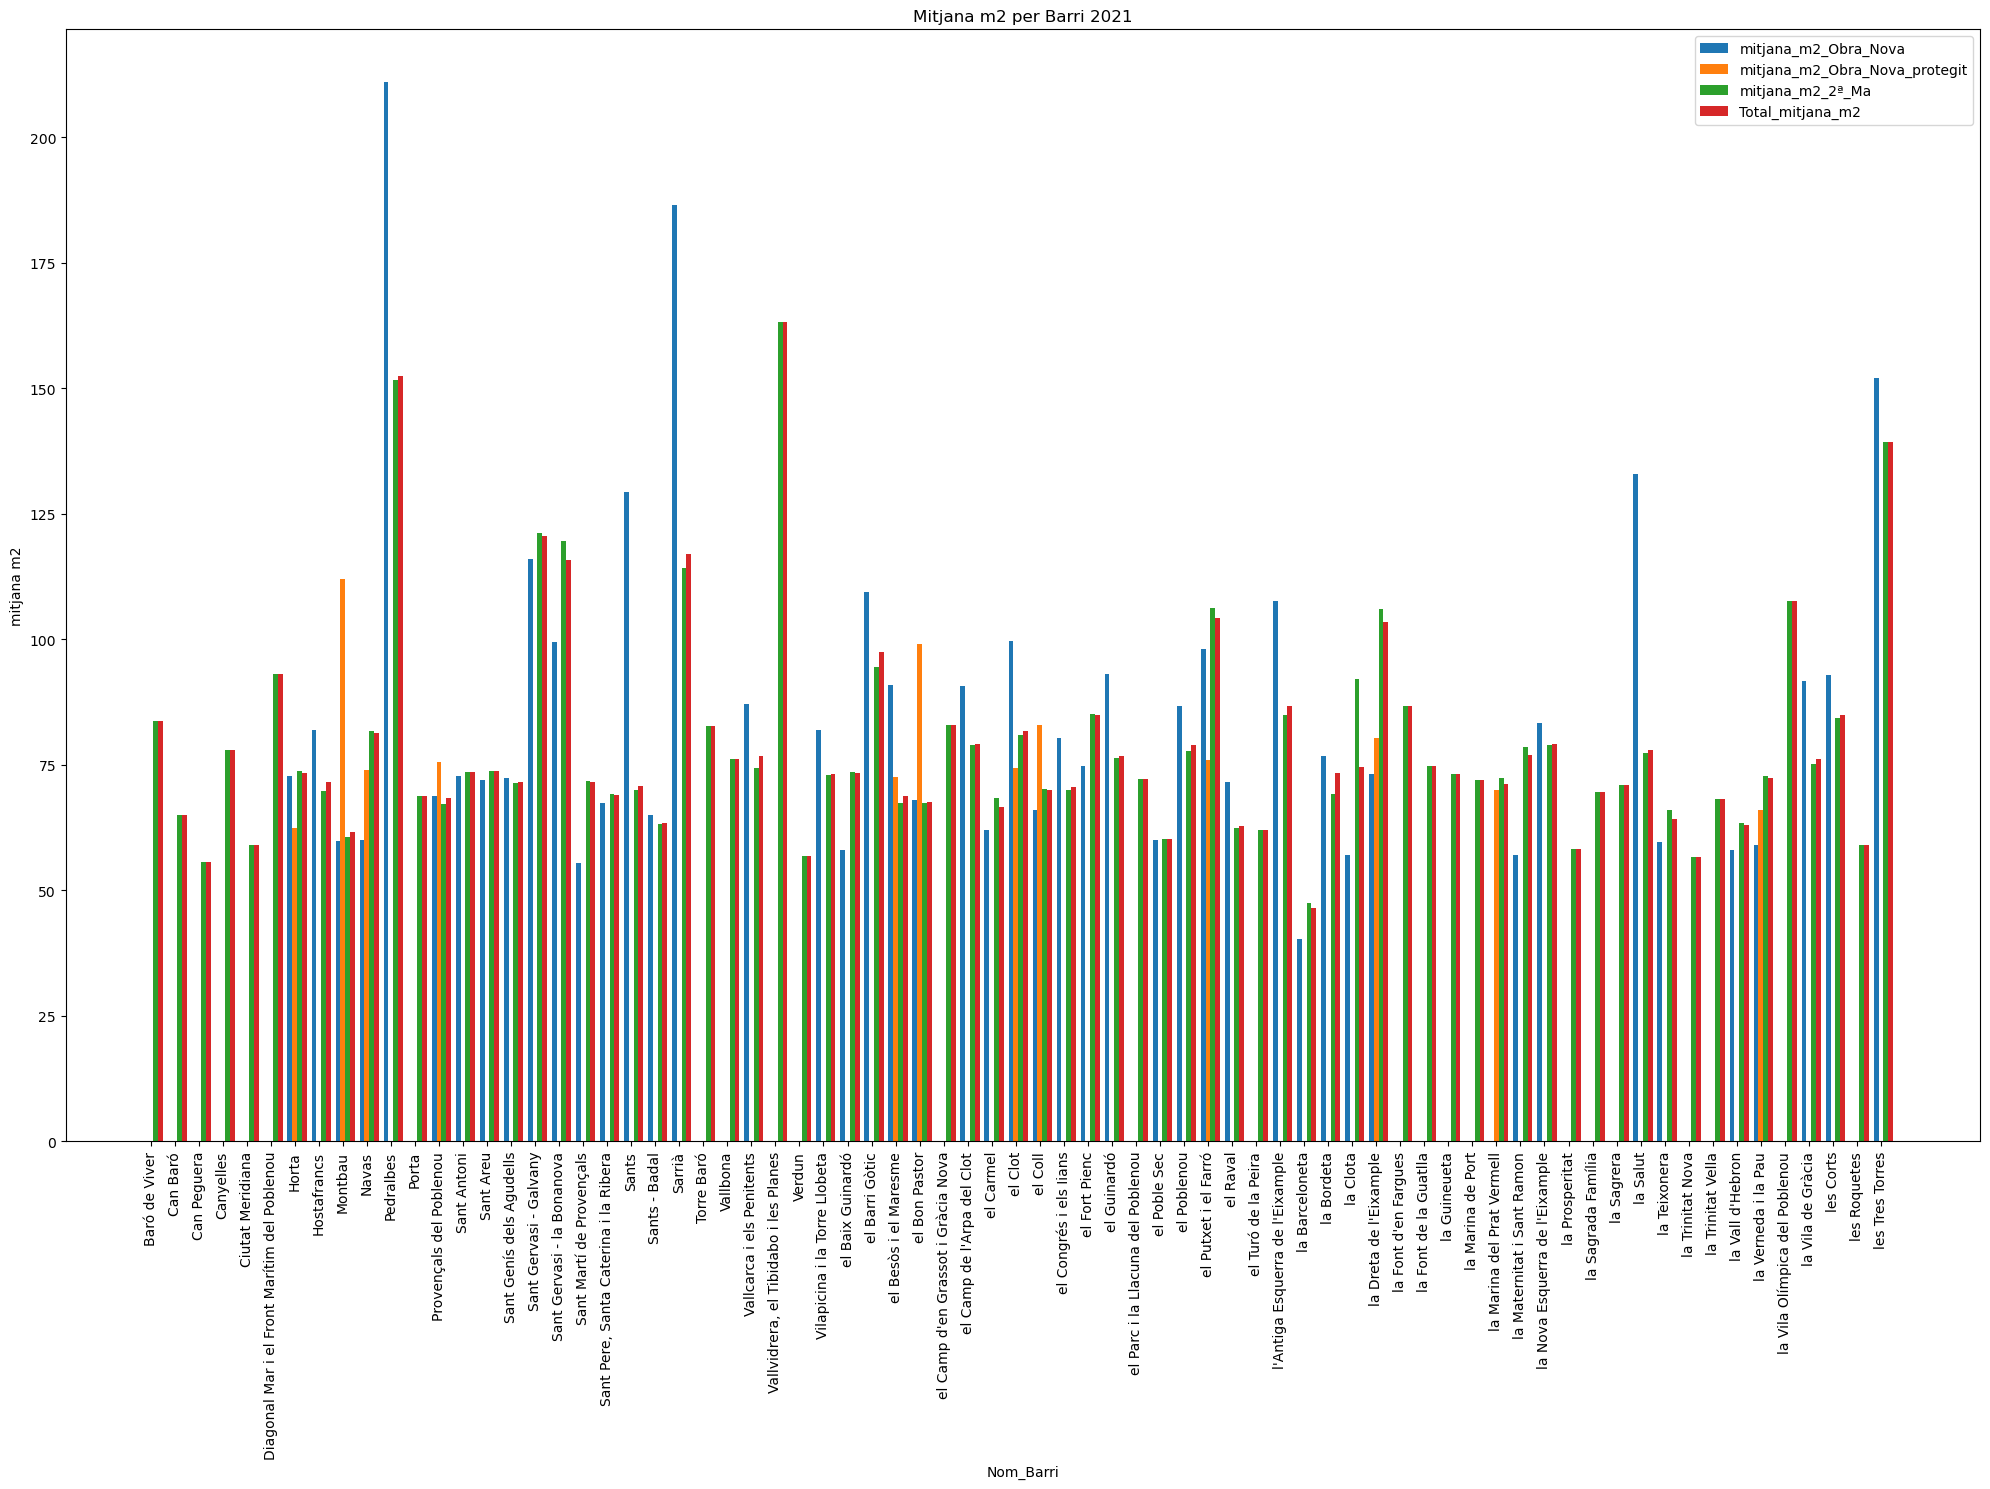

In [76]:
# Extraer los valores de las columnas relevantes
nom_barri = df_4_mitjana_m2["Nom_Barri"]
mitjana_m2_obra_nova = df_4_mitjana_m2["mitjana_m2_Obra_Nova"]
mitjana_m2_obra_nova_protegit = df_4_mitjana_m2["mitjana_m2_Obra_Nova_protegit"]
mitjana_m2_2a_ma = df_4_mitjana_m2["mitjana_m2_2ª_Ma"]
total_mitjana_m2 = df_4_mitjana_m2["Total_mitjana_m2"]

# Configuración de los datos
barrios = np.arange(len(nom_barri))  # Posiciones de las barras en el eje x
ancho_barra = 0.2  # Ancho de las barras

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(20, 15))  # Opcional: ajustar el tamaño de la figura
plt.bar(barrios, mitjana_m2_obra_nova, width=ancho_barra, label="mitjana_m2_Obra_Nova")
plt.bar(barrios + ancho_barra, mitjana_m2_obra_nova_protegit, width=ancho_barra, label="mitjana_m2_Obra_Nova_protegit")
plt.bar(barrios + (2 * ancho_barra), mitjana_m2_2a_ma, width=ancho_barra, label="mitjana_m2_2ª_Ma")
plt.bar(barrios + (3 * ancho_barra), total_mitjana_m2, width=ancho_barra, label="Total_mitjana_m2")

# Personalizar el gráfico
plt.xlabel("Nom_Barri")
plt.ylabel("mitjana m2")
plt.title("Mitjana m2 per Barri 2021")
plt.xticks(barrios + ancho_barra, nom_barri, rotation=90
          )  # Etiquetas del eje x
plt.legend()  # Mostrar la leyenda

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()

**Dataset df_5 año 2022**

In [77]:
df_5

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Superfície_mitjana_(m2_construïts),Nombre
0,2022,1,1,Ciutat Vella,1,el Raval,Total,67.4
1,2022,1,1,Ciutat Vella,2,el Barri Gòtic,Total,91.0
2,2022,1,1,Ciutat Vella,3,la Barceloneta,Total,49.7
3,2022,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Total,74.5
4,2022,1,2,Eixample,5,el Fort Pienc,Total,81.8
...,...,...,...,...,...,...,...,...
871,2022,3,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Habitatge usat,88.1
872,2022,3,10,Sant Martí,70,el Besòs i el Maresme,Habitatge usat,72.4
873,2022,3,10,Sant Martí,71,Provençals del Poblenou,Habitatge usat,75.3
874,2022,3,10,Sant Martí,72,Sant Martí de Provençals,Habitatge usat,71.5


In [78]:
df_5 = df_5.drop(["Codi_Districte", "Codi_Barri"], axis=1)

print(df_5)

      Any  Trimestre Nom_Districte  \
0    2022          1  Ciutat Vella   
1    2022          1  Ciutat Vella   
2    2022          1  Ciutat Vella   
3    2022          1  Ciutat Vella   
4    2022          1      Eixample   
..    ...        ...           ...   
871  2022          3    Sant Martí   
872  2022          3    Sant Martí   
873  2022          3    Sant Martí   
874  2022          3    Sant Martí   
875  2022          3    Sant Martí   

                                        Nom_Barri  \
0                                        el Raval   
1                                  el Barri Gòtic   
2                                  la Barceloneta   
3           Sant Pere, Santa Caterina i la Ribera   
4                                   el Fort Pienc   
..                                            ...   
871  Diagonal Mar i el Front Marítim del Poblenou   
872                         el Besòs i el Maresme   
873                       Provençals del Poblenou   
874          

In [79]:
nuevos_nombres = {
    'Habitatge nou lliure': 'mitjana_m2_Obra_Nova',
    'Habitatge nou protegit': 'mitjana_m2_Obra_Nova_protegit',
    'Habitatge usat': 'mitjana_m2_2ª_Ma',
    'Total': 'Total_mitjana_m2',
}
df_5_pivot = pivote.rename(columns=nuevos_nombres)

print(df_5_pivot)

     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             NaN              65.0              65.0  
2  

In [80]:
columnas_deseadas = ['Any', 'Nom_Barri', 'mitjana_m2_Obra_Nova', 'mitjana_m2_Obra_Nova_protegit', 'mitjana_m2_2ª_Ma', 'Total_mitjana_m2']
df_5_pivot = df_5_pivot[columnas_deseadas]

print(df_5_pivot)

     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             NaN              65.0              65.0  
2  

In [81]:
# Agrupar los datos por "Nom_Barri" y "Any" y calcular la media de cada grupo
df_media = df_5_pivot.groupby(['Any','Nom_Barri']).mean()

# Calcular el precio medio dividiendo la suma por el número de trimestres (en este caso, 4)
df_5_mitjana_m2 = df_media.div(4)

# Redondear el precio medio a un decimal
df_5_mitjana_m2 = df_media.round(1)

# Restablecer el índice del DataFrame
df_5_mitjana_m2 = df_5_mitjana_m2.reset_index()

# Imprimir el resultado
print("media por m2 por barrio para cada columna:")
print(df_5_mitjana_m2)

media por m2 por barrio para cada columna:
     Any                      Nom_Barri  mitjana_m2_Obra_Nova  \
0   2018                  Baró de Viver                   NaN   
1   2018                       Can Baró                   NaN   
2   2018                    Can Peguera                   NaN   
3   2018                      Canyelles                   NaN   
4   2018               Ciutat Meridiana                   NaN   
..   ...                            ...                   ...   
68  2018  la Vila Olímpica del Poblenou                   NaN   
69  2018              la Vila de Gràcia                  91.6   
70  2018                      les Corts                  92.8   
71  2018                   les Roquetes                   NaN   
72  2018                les Tres Torres                 152.0   

    mitjana_m2_Obra_Nova_protegit  mitjana_m2_2ª_Ma  Total_mitjana_m2  
0                             NaN              83.7              83.7  
1                             Na

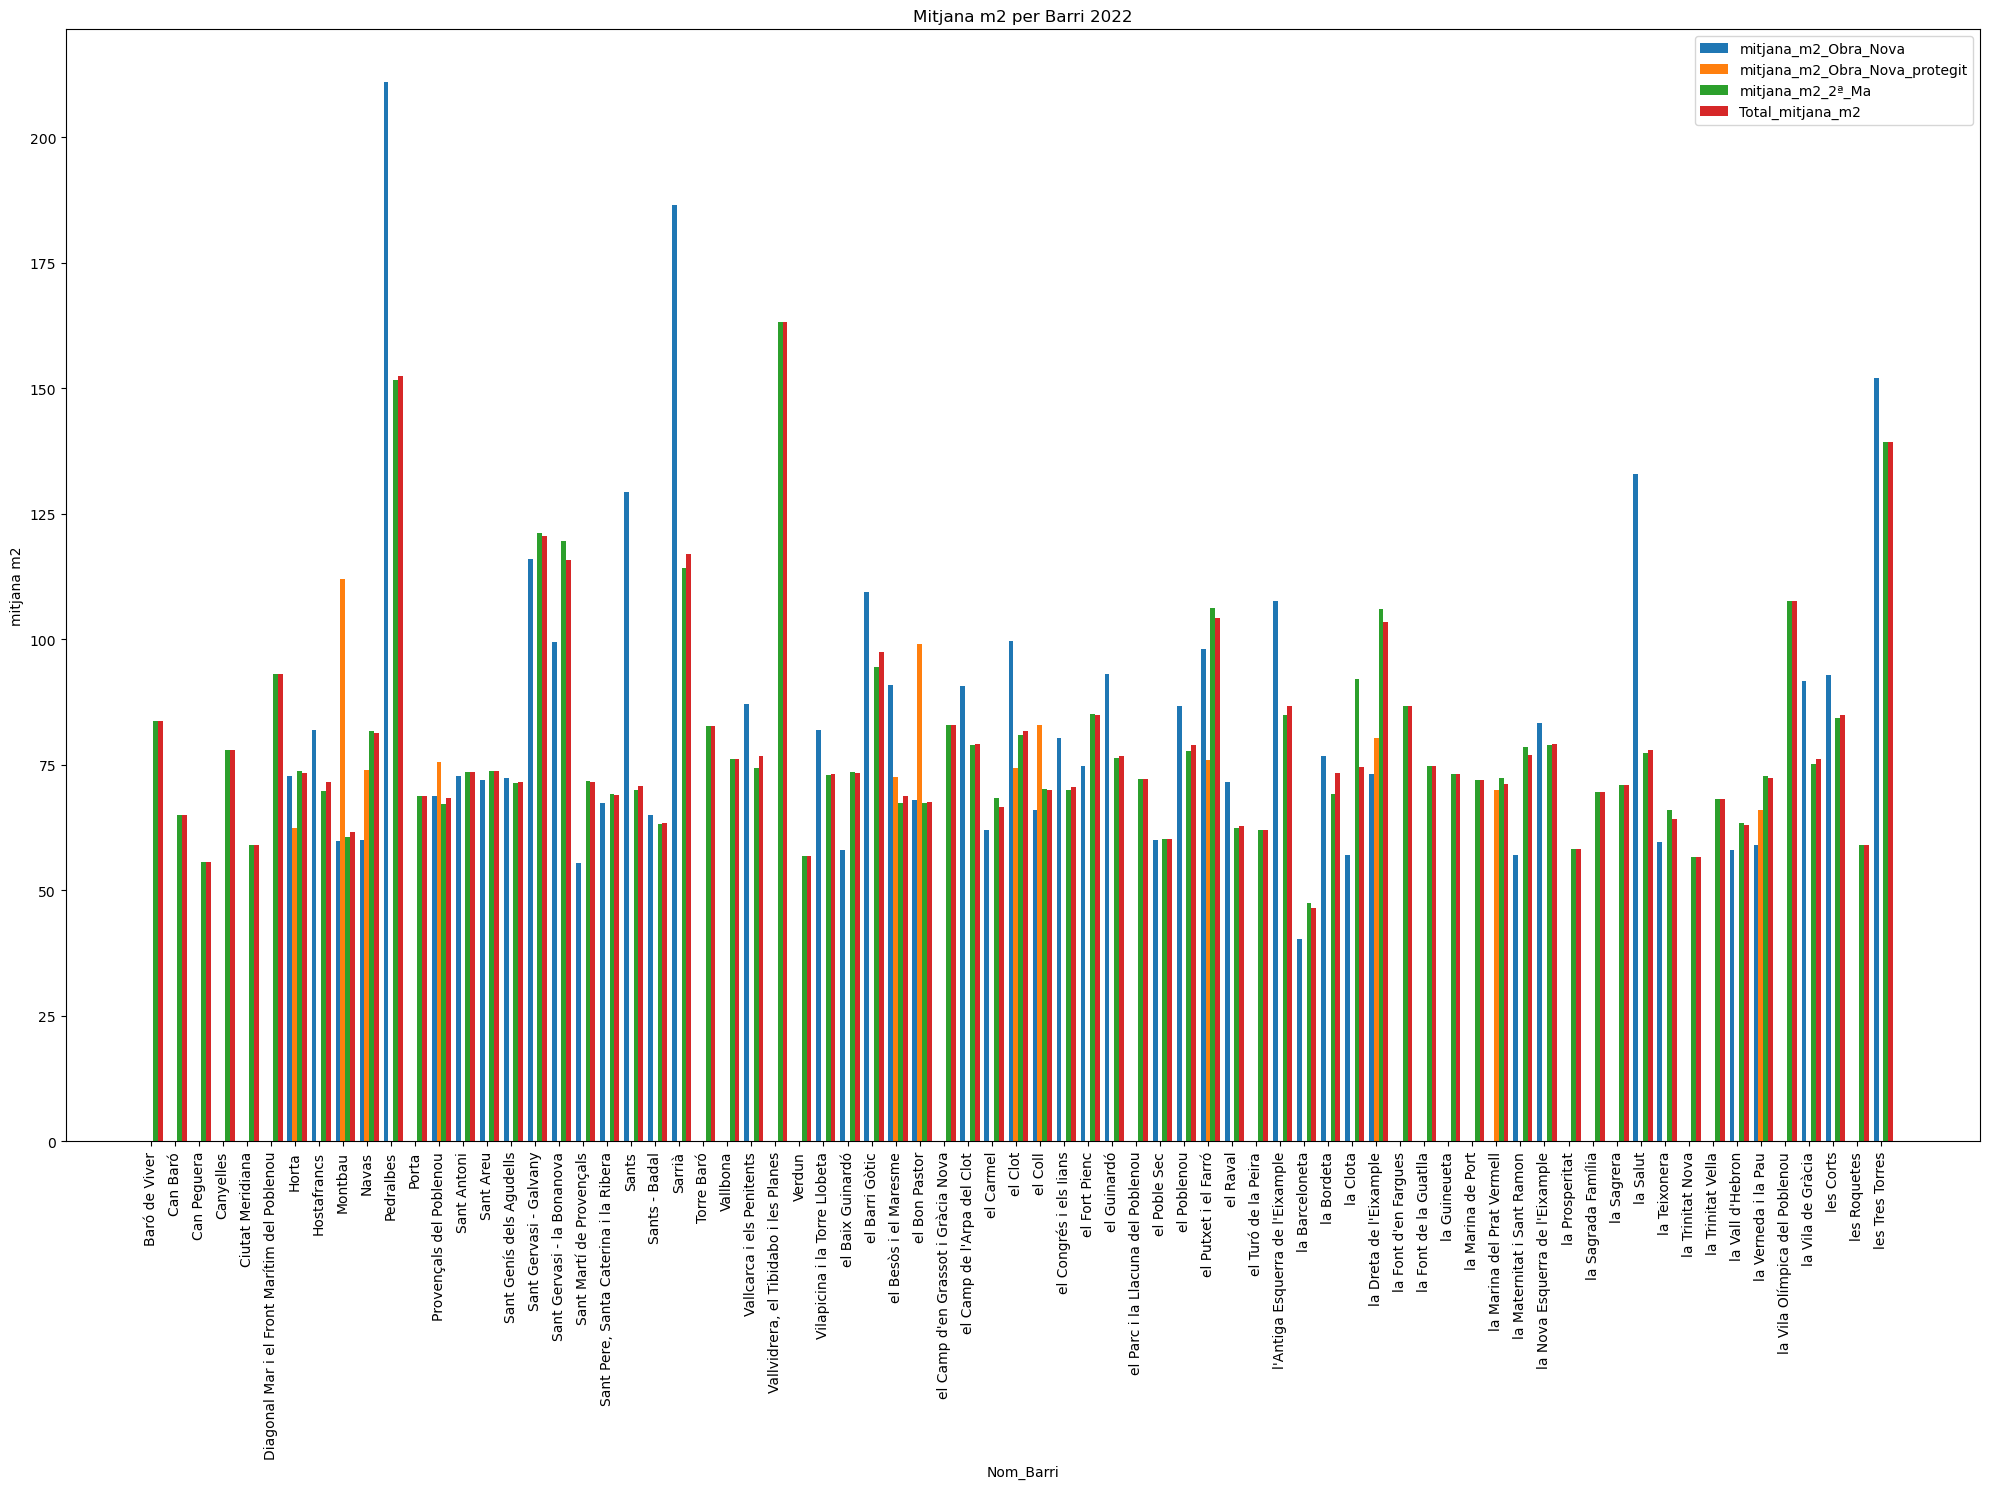

In [83]:
# Extraer los valores de las columnas relevantes
nom_barri = df_5_mitjana_m2["Nom_Barri"]
mitjana_m2_obra_nova = df_5_mitjana_m2["mitjana_m2_Obra_Nova"]
mitjana_m2_obra_nova_protegit = df_5_mitjana_m2["mitjana_m2_Obra_Nova_protegit"]
mitjana_m2_2a_ma = df_5_mitjana_m2["mitjana_m2_2ª_Ma"]
total_mitjana_m2 = df_5_mitjana_m2["Total_mitjana_m2"]

# Configuración de los datos
barrios = np.arange(len(nom_barri))  # Posiciones de las barras en el eje x
ancho_barra = 0.2  # Ancho de las barras

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(20, 15))  # Opcional: ajustar el tamaño de la figura
plt.bar(barrios, mitjana_m2_obra_nova, width=ancho_barra, label="mitjana_m2_Obra_Nova")
plt.bar(barrios + ancho_barra, mitjana_m2_obra_nova_protegit, width=ancho_barra, label="mitjana_m2_Obra_Nova_protegit")
plt.bar(barrios + (2 * ancho_barra), mitjana_m2_2a_ma, width=ancho_barra, label="mitjana_m2_2ª_Ma")
plt.bar(barrios + (3 * ancho_barra), total_mitjana_m2, width=ancho_barra, label="Total_mitjana_m2")

# Personalizar el gráfico
plt.xlabel("Nom_Barri")
plt.ylabel("mitjana m2")
plt.title("Mitjana m2 per Barri 2022")
plt.xticks(barrios + ancho_barra, nom_barri, rotation=90
          )  # Etiquetas del eje x
plt.legend()  # Mostrar la leyenda

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()

## Combinar los 5 dataframe

In [85]:
df_concat_mitjana_m2_2018_2022 = pd.concat([df_1_pivot, df_2_mitjana_m2, df_3_mitjana_m2, df_4_mitjana_m2, df_5_mitjana_m2])

In [86]:
df_concat_mitjana_m2_2018_2022

,Any,Nom_Barri,mitjana_m2_Obra_Nova,mitjana_m2_Obra_Nova_protegit,mitjana_m2_2ª_Ma,Total_mitjana_m2
0,2018,Baró de Viver,NaN,NaN,83.7,83.7
1,2018,Can Baró,NaN,NaN,65.0,65.0
2,2018,Can Peguera,NaN,NaN,55.7,55.7
3,2018,Canyelles,NaN,NaN,78.0,78.0
4,2018,Ciutat Meridiana,NaN,NaN,59.0,59.0
...,...,...,...,...,...,...
68,2018,la Vila Olímpica del Poblenou,NaN,NaN,107.6,107.6
69,2018,la Vila de Gràcia,91.6,NaN,75.1,76.2
70,2018,les Corts,92.8,NaN,84.3,84.9
71,2018,les Roquetes,NaN,NaN,59.0,59.0


In [87]:
df_concat_mitjana_m2_2018_2022.to_csv('df_concat_mitjana_m2_2018_2022', index=False)